<h1 style="text-align: center;">Optimisez la gestion des données d'une boutique avec R ou Python</h1><font></font>

***


<img src="Logo_lapage.png"  alt="Nature" class="responsive" align: center/>


<h2 style="text-align: center;">Parnasse Jérôme le 18/03/2023</h2><font></font>


#### Importation des bibliotheques

In [1]:

# Manipulaion de données
import pandas as pd
import numpy as np

# Visualisation de données
import seaborn as sns
import seaborn.objects as so
import altair as alt
import matplotlib.pyplot as plt

# Visualisation de données manquantes
import missingno as msno

# Filtre d'avertissement
import warnings
warnings.simplefilter("ignore")

# Manipulation et formatage pour l'affichage date et heure
import locale
from datetime import datetime, date, time, timezone
locale.setlocale(locale.LC_ALL, 'fr_FR.utf8')

# Fonctions personnalisées
import functions as f




## SOMMAIRE <span id='sommaire'>

- [Préparation des données](#sommaire)
    - [Customers](#cus)
    - [Productss](#prod)
    - [Transactions](#trans)
- [Jointure des tables](#joint)
    - [Customer et transactionn](#ct)
    - [Products et Customer-transactionn](#pct)

  

#### Importation des jeux de données

In [2]:
# Fichier des clients
customers = pd.read_csv("datasets/customers.csv")

# Fichier des produits
products = pd.read_csv("datasets/products.csv")

# Fichier des transactions
transactions = pd.read_csv("datasets/transactions.csv")

In [3]:
#Affichage des 5 première ligne du dataframe customers
customers.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
#Affichage des 5 première ligne du dataframe products
products.head(5)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
#Affichage des 5 première ligne du dataframe transactions
transactions.head(5)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


<details>
  <summary>Fichier clients...</summary>
  
  


<h2 style="text-align: center;">*** Préparation des données ***
</h2><font></font>

### Exploration du fichier customers
<a name="Customers"></a> 


#### Fichier qui contient :
- Identifiant du client
- Le sexe
- Année de naissance

</details>

<a id="cus" class="btn btn-default" href="#sommaire"> retour au sommaire </a>


In [6]:
#informations du dataframe customers
f.df_infos(customers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB

 Valeur non null et Type : 
 None 


 Visualisation de table : 
   client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943 


 Nombre de ligne et de colonne  
 (8623, 3) 


 Test de valeur aberrante : 
        client_id   sex        birth
count       8623  8623  8623.000000
unique      8623     2          NaN
top       c_4410     f          NaN
freq           1  4491          NaN
mean         NaN   NaN  1978.280877
std          NaN   NaN    16.919535
min          NaN   NaN  1929.000000
25%          NaN   NaN  1966.000000
50%          NaN   NaN  1979.000000
75%

In [7]:
#compte le nombre de valeur unique, dounblon et manquante du dataframe customers
f.df_unicité(customers)

Cette colonne peut etre candidate à une clé primaire
Pour la colonne client_id
Le nombre de valeur unique est de : 8623
Le nombre total de doublon est de : 0
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne sex
Le nombre de valeur unique est de : 2
Le nombre total de doublon est de : 8621
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne birth
Le nombre de valeur unique est de : 76
Le nombre total de doublon est de : 8547
Le nombre de donnée manquante est de : 0




In [8]:
print(customers)

     client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]


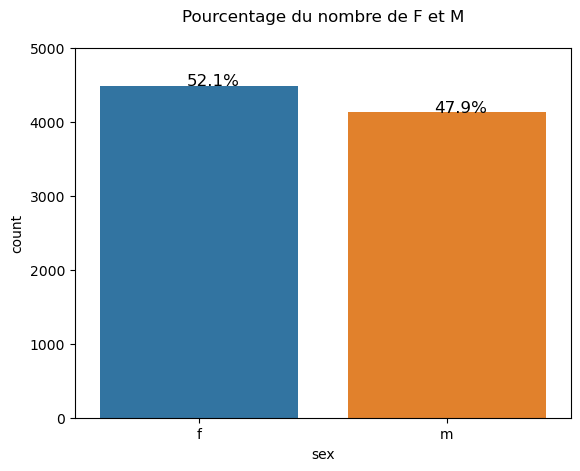

In [9]:
#Affichage du barplot (répartition F/M au sein des clients)
ax = sns.countplot(x ='sex', data = customers)
ax.set_title('Pourcentage du nombre de F et M', loc='center', y=1.05)
plt.axis([None, None, 0, 5000])
total = len(customers["sex"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
      
plt.savefig('graphiques/pourcentage_fm.png', dpi=300)
plt.show()



##### (Le dataframe customers ne contient pas de donnée manquante)

<Details>
  <summary>Fichier produits...</summary>
<h2 style="text-align: center;">*** Préparation des données ***
</h2><font></font>
    
### Exploration du fichier products
<a name="Products"></a>

#### Fichier qui contient :
- Identifiant du produit
- Le prix
- La catégorie
</Details>

<a id="prod" class="btn btn-default" href="#sommaire"> retour au sommaire </a>


In [10]:
#informations du dataframe products
f.df_infos(products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB

 Valeur non null et Type : 
 None 


 Visualisation de table : 
   id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0 


 Nombre de ligne et de colonne  
 (3287, 3) 


 Test de valeur aberrante : 
        id_prod        price        categ
count     3287  3287.000000  3287.000000
unique    3287          NaN          NaN
top     0_1421          NaN          NaN
freq         1          NaN          NaN
mean       NaN    21.856641     0.370246
std        NaN    29.847908     0.615387
min        NaN    -1.000000     0.000000
25%        NaN     6.99

In [11]:
# Compte le nombre de valeur dans chaque catégorie
products['categ'].value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

In [12]:
#Création d'un dataframe ayant pour valeur les prix égal à -1
anom_products = products[products['price'] == -1]
anom_products

,id_prod,price,categ
731,T_0,-1.0,0


In [13]:
#compte le nombre de valeur unique, dounblon et manquante du dataframe products
f.df_unicité(products)

Cette colonne peut etre candidate à une clé primaire
Pour la colonne id_prod
Le nombre de valeur unique est de : 3287
Le nombre total de doublon est de : 0
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne price
Le nombre de valeur unique est de : 1455
Le nombre total de doublon est de : 1832
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne categ
Le nombre de valeur unique est de : 3
Le nombre total de doublon est de : 3284
Le nombre de donnée manquante est de : 0




##### (Le dataframe products ne contient pas de donnée manquante)
##### Une ligne apparait avec un prix négatif


<Details>
  <summary>Fichier transaction...</summary>
<h2 style="text-align: center;">*** Préparation des données ***
</h2><font></font>

### Exploration du fichier transactions
<a name="Transactions"></a>

#### Fichier qui contient :
- Identifiant du produit
- La date et l'heure
- Identifiant de session
- Identifiant client
</Details>

<a id="trans" class="btn btn-default" href="#sommaire"> retour au sommaire </a>

    

In [14]:
#informations du dataframe transactions
f.df_infos(transactions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB

 Valeur non null et Type : 
 None 


 Visualisation de table : 
   id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232 


 Nombre de ligne et de colonne  
 (679532, 4) 


 Test de valeur aberrante : 
        id_prod                             date session_id client_id
count   679532                  

In [15]:
#Création d'un dataframe dont les dates commence par t pour test
anom_transactions = transactions[transactions['date'].str.count(r'(^t.*)')==1]
anom_transactions

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [16]:
#compte le nombre de valeur unique, dounblon et manquante du dataframe transactions
f.df_unicité(transactions)

Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne id_prod
Le nombre de valeur unique est de : 3267
Le nombre total de doublon est de : 676265
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne date
Le nombre de valeur unique est de : 679371
Le nombre total de doublon est de : 161
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne session_id
Le nombre de valeur unique est de : 342316
Le nombre total de doublon est de : 337216
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne client_id
Le nombre de valeur unique est de : 8602
Le nombre total de doublon est de : 670930
Le nombre de donnée manquante est de : 0




##### (Le dataframe transaction ne contient pas de donnée manquante)
##### des lignes test appararaissent et peuvent fausser les calcul avec un prix négatif


<h2 style="text-align: center;">*** Traitements des données ***
</h2><font></font>

### Fusion entre les dataframes customers et transactions

<a id="ct" class="btn btn-default" href="#sommaire"> retour au sommaire </a>


In [17]:
""" 
J'ai choisi La fusion "externe" car elle combine toutes les lignes des dataframes gauche et droite avec NaN 
lorsqu'il n'y a pas de valeurs correspondantes dans les lignes.

la méthode indicator est définie sur True afin d'indiquer d'où provient chaque ligne dans les données de fusion 
"""
df_temp_custom_transac = pd.merge(customers,transactions,on='client_id', how='outer', indicator = True)
df_temp_custom_transac.head(3)

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,both


<AxesSubplot:>

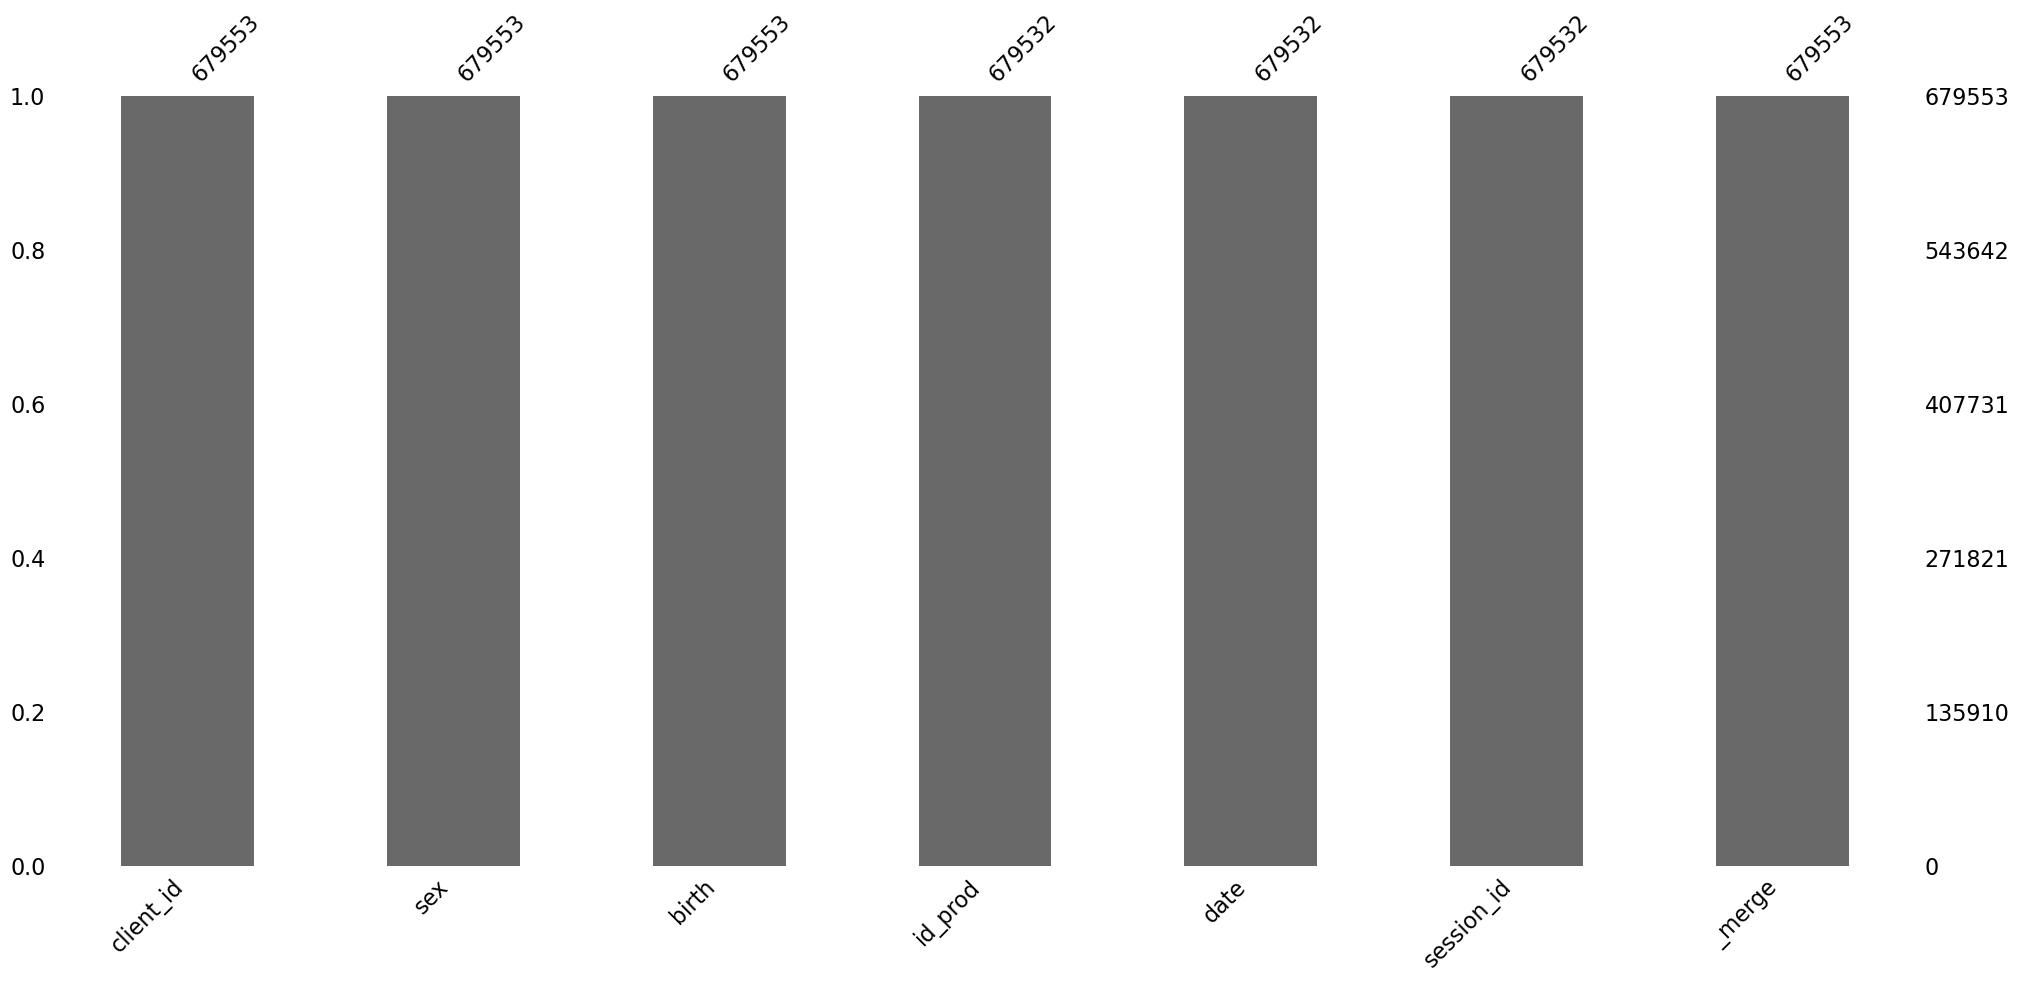

In [18]:
msno.bar(df_temp_custom_transac)


In [19]:
nan_df = df_temp_custom_transac[df_temp_custom_transac.isna().any(axis=1)]
nan_df.style

,client_id,sex,birth,id_prod,date,session_id,_merge
59493,c_8253,f,2001,nan,nan,nan,left_only
200286,c_3789,f,1997,nan,nan,nan,left_only
218173,c_4406,f,1998,nan,nan,nan,left_only
220494,c_2706,f,1967,nan,nan,nan,left_only
225644,c_3443,m,1959,nan,nan,nan,left_only
248515,c_4447,m,1956,nan,nan,nan,left_only
249071,c_3017,f,1992,nan,nan,nan,left_only
261130,c_4086,f,1992,nan,nan,nan,left_only
313239,c_6930,m,2004,nan,nan,nan,left_only
319833,c_4358,m,1999,nan,nan,nan,left_only


In [20]:
#compte les différentes valeur dans _merge
df_temp_custom_transac ['_merge'].value_counts()

both          679532
left_only         21
right_only         0
Name: _merge, dtype: int64

In [21]:
#creation du dataframe ayant comme valeur 'both' (commune) entre les deux tables
df_temp_custom_transac_2  = df_temp_custom_transac [df_temp_custom_transac ['_merge'] == 'both']
df_temp_custom_transac_2.head(3)

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,both


In [22]:
#suppression de la colonne _merge
df_temp_custom_transac_2 .drop(columns='_merge', axis=1, inplace=True)
df_temp_custom_transac_2 .head(3)

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628


In [23]:
f.df_infos(df_temp_custom_transac_2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679532 entries, 0 to 679552
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   client_id   679532 non-null  object
 1   sex         679532 non-null  object
 2   birth       679532 non-null  int64 
 3   id_prod     679532 non-null  object
 4   date        679532 non-null  object
 5   session_id  679532 non-null  object
dtypes: int64(1), object(5)
memory usage: 36.3+ MB

 Valeur non null et Type : 
 None 


 Visualisation de table : 
   client_id sex  birth id_prod                        date session_id
0    c_4410   f   1967  0_1316  2021-12-29 09:11:18.860592   s_141762
1    c_4410   f   1967   1_385  2021-03-22 01:40:22.782925     s_9707
2    c_4410   f   1967   1_190  2021-11-12 18:11:43.280574   s_118628
3    c_4410   f   1967  0_1455  2021-03-22 14:29:25.189266     s_9942
4    c_4410   f   1967   1_483  2022-03-13 21:35:55.949042   s_178686 


 Nombre de ligne et de

In [24]:
f.df_unicité(df_temp_custom_transac_2)

Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne client_id
Le nombre de valeur unique est de : 8602
Le nombre total de doublon est de : 670930
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne sex
Le nombre de valeur unique est de : 2
Le nombre total de doublon est de : 679530
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne birth
Le nombre de valeur unique est de : 76
Le nombre total de doublon est de : 679456
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne id_prod
Le nombre de valeur unique est de : 3267
Le nombre total de doublon est de : 676265
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne date
Le nombre de valeur unique est de : 679371
Le nombre total de doublon est de : 161
Le nombre de donnée m

<h2 style="text-align: center;">*** Traitements des données ***
</h2><font></font>

### Fusion entre le dataframe products et la fusion des dataframes customers et transactions

<a id="pct" class="btn btn-default" href="#sommaire"> retour au sommaire </a>



In [25]:
""" 
J'ai choisi La fusion "externe" car elle combine toutes les lignes des dataframes gauche et droite avec NaN 
lorsqu'il n'y a pas de valeurs correspondantes dans les lignes.

la méthode indicator est définie sur True afin d'indiquer d'où provient chaque ligne dans les données de fusion 
"""
df_temp_products_custom_transac  = pd.merge(products,df_temp_custom_transac_2 ,on='id_prod', how='outer', indicator = True)
df_temp_products_custom_transac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679553 entries, 0 to 679552
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     679553 non-null  object  
 1   price       679332 non-null  float64 
 2   categ       679332 non-null  float64 
 3   client_id   679532 non-null  object  
 4   sex         679532 non-null  object  
 5   birth       679532 non-null  float64 
 6   date        679532 non-null  object  
 7   session_id  679532 non-null  object  
 8   _merge      679553 non-null  category
dtypes: category(1), float64(3), object(5)
memory usage: 47.3+ MB


In [26]:
df_temp_products_custom_transac.isnull().sum()

id_prod         0
price         221
categ         221
client_id      21
sex            21
birth          21
date           21
session_id     21
_merge          0
dtype: int64

In [27]:
# creation d'un dataframe avec les valeurs manquante
nan_df = df_temp_products_custom_transac[df_temp_products_custom_transac.isna().any(axis=1)]
nan_df.style

,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
39705,0_1016,35.060000,0.000000,nan,nan,nan,nan,nan,left_only
62805,0_1780,1.670000,0.000000,nan,nan,nan,nan,nan,left_only
162965,0_1062,20.080000,0.000000,nan,nan,nan,nan,nan,left_only
177722,0_1119,2.990000,0.000000,nan,nan,nan,nan,nan,left_only
181372,0_1014,1.150000,0.000000,nan,nan,nan,nan,nan,left_only
188221,1_0,31.820000,1.000000,nan,nan,nan,nan,nan,left_only
230668,0_1318,20.920000,0.000000,nan,nan,nan,nan,nan,left_only
253665,0_1800,22.050000,0.000000,nan,nan,nan,nan,nan,left_only
290609,0_1645,2.990000,0.000000,nan,nan,nan,nan,nan,left_only
321061,0_322,2.990000,0.000000,nan,nan,nan,nan,nan,left_only


In [28]:
nan_df.head(1)

,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
39705,0_1016,35.06,0.0,NaN,NaN,NaN,NaN,NaN,left_only


In [29]:
nan_df.loc[nan_df['id_prod']=='0_2245']

,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
679332,0_2245,NaN,NaN,c_4505,m,1976.0,2022-01-09 09:23:31.000720,s_147220,right_only
679333,0_2245,NaN,NaN,c_4505,m,1976.0,2022-11-09 09:23:31.000720,s_295013,right_only
679334,0_2245,NaN,NaN,c_3468,f,1981.0,2021-09-11 10:52:05.205583,s_88251,right_only
679335,0_2245,NaN,NaN,c_3468,f,1981.0,2022-05-11 10:52:05.205583,s_206902,right_only
679336,0_2245,NaN,NaN,c_1403,f,1978.0,2022-09-15 14:26:50.187952,s_268455,right_only
...,...,...,...,...,...,...,...,...,...
679548,0_2245,NaN,NaN,c_4283,f,1976.0,2022-08-01 02:46:38.931757,s_246657,right_only
679549,0_2245,NaN,NaN,c_4283,f,1976.0,2021-09-01 02:46:38.931757,s_83377,right_only
679550,0_2245,NaN,NaN,c_6236,f,1976.0,2022-02-25 00:08:08.736068,s_170426,right_only
679551,0_2245,NaN,NaN,c_4453,m,1981.0,2022-02-16 11:35:20.319501,s_166050,right_only


In [30]:
prix_moyen_categ0 = df_temp_products_custom_transac.loc[df_temp_products_custom_transac.categ < 1, :]
prix_moyen_categ0['price'].mean()

10.632729969383288

In [31]:
# Remplacement des NaN dans PRICE avec moyenne des PRICE
df_temp_products_custom_transac['price'].fillna(prix_moyen_categ0['price'].mean(), inplace=True)
# Remplacement des NaN dans CATEG par 0
df_temp_products_custom_transac['categ'].fillna(0, inplace=True)

In [32]:
df_temp_products_custom_transac.dropna(inplace=True)


In [33]:
#compte les différentes valeur dans _merge
df_temp_products_custom_transac['_merge'].value_counts()

both          679311
right_only       221
left_only          0
Name: _merge, dtype: int64

In [34]:
df_temp_products_custom_transac.isnull().sum()

id_prod       0
price         0
categ         0
client_id     0
sex           0
birth         0
date          0
session_id    0
_merge        0
dtype: int64

In [35]:
#creation du dataframe ayant comme valeur 'both' (commune) entre les deux tables

df_temp_products_custom_transac_2 = df_temp_products_custom_transac[df_temp_products_custom_transac['_merge'] == 'both']
df_temp_products_custom_transac_2.head(3)

,id_prod,price,categ,client_id,sex,birth,date,session_id,_merge
0,0_1421,19.99,0.0,c_5152,f,1986.0,2021-04-17 06:09:37.424812,s_21727,both
1,0_1421,19.99,0.0,c_2167,f,1960.0,2021-11-24 00:28:06.088699,s_124134,both
2,0_1421,19.99,0.0,c_2167,f,1960.0,2022-08-24 00:28:06.088699,s_257560,both


In [36]:
#suppression de la colonne _merge
df_temp_products_custom_transac_2.drop(columns='_merge', axis=1, inplace=True)
df_temp_products_custom_transac_2.head(3)


,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1421,19.99,0.0,c_5152,f,1986.0,2021-04-17 06:09:37.424812,s_21727
1,0_1421,19.99,0.0,c_2167,f,1960.0,2021-11-24 00:28:06.088699,s_124134
2,0_1421,19.99,0.0,c_2167,f,1960.0,2022-08-24 00:28:06.088699,s_257560


In [37]:
#changement de l'index sur id_prod pour facilité la supression de ligne
df_temp_products_custom_transac_2.set_index('id_prod', inplace=True)
df_temp_products_custom_transac_2.head(3)

,price,categ,client_id,sex,birth,date,session_id
id_prod,,,,,,,
0_1421,19.99,0.0,c_5152,f,1986.0,2021-04-17 06:09:37.424812,s_21727
0_1421,19.99,0.0,c_2167,f,1960.0,2021-11-24 00:28:06.088699,s_124134
0_1421,19.99,0.0,c_2167,f,1960.0,2022-08-24 00:28:06.088699,s_257560


In [38]:
#suppression des lignes commencant T_O correspondant au test
df_temp_products_custom_transac_2.drop('T_0', axis=0, inplace=True)
df_temp_products_custom_transac_2.tail(5)

,price,categ,client_id,sex,birth,date,session_id
id_prod,,,,,,,
1_140,38.56,1.0,c_7406,m,1988.0,2021-12-09 14:20:34.169187,s_131828
0_1920,25.16,0.0,c_7748,f,1989.0,2023-01-30 02:37:22.371278,s_334324
0_1920,25.16,0.0,c_7748,f,1989.0,2021-05-30 02:37:22.371278,s_41465
0_1920,25.16,0.0,c_7748,f,1989.0,2022-12-30 02:37:22.371278,s_319303
0_1920,25.16,0.0,c_7088,m,1987.0,2021-04-13 18:36:10.252971,s_20115


In [39]:
#converti les valeurs float en int des colonne categ et birth
df_temp_products_custom_transac_2.categ = df_temp_products_custom_transac_2.categ.astype('int64')
df_temp_products_custom_transac_2.birth = df_temp_products_custom_transac_2.birth.astype('int64')

#Creation d'une colonne age_client calcule effectué à partir de la date de naissance
an_en_cours = 2023
df_temp_products_custom_transac_2['age']= an_en_cours- df_temp_products_custom_transac_2['birth'] 



In [40]:
# converti la colonne date en pandas datetime et supprime les seconds avec la fonction lambda
df_temp_products_custom_transac_2["date"] = pd.to_datetime(df_temp_products_custom_transac_2["date"], format="%Y-%m-%d").map(lambda x: x.replace(hour=0,minute=0,second=0,microsecond=0))




df_lapage =  df_temp_products_custom_transac_2[['date','price', 'categ', 'client_id', 'sex', 'age', 'session_id']]
df_lapage.reset_index(inplace=True)
df_lapage.drop_duplicates(keep=False, inplace=True)
#df_lapage.set_index('date',inplace=True)
#df_lapage =  df_temp_products_custom_transac_2[['date','id_prod','price', 'categ', 'client_id', 'sex', 'age', 'session_id']]
df_lapage["day"] = df_lapage['date'].dt.day
df_lapage["month"] = df_lapage['date'].dt.month
df_lapage["year"] = df_lapage['date'].dt.year

df_lapage

,id_prod,date,price,categ,client_id,sex,age,session_id,day,month,year
0,0_1421,2021-04-17,19.99,0,c_5152,f,37,s_21727,17,4,2021
1,0_1421,2021-11-24,19.99,0,c_2167,f,63,s_124134,24,11,2021
2,0_1421,2022-08-24,19.99,0,c_2167,f,63,s_257560,24,8,2022
3,0_1421,2021-04-06,19.99,0,c_3060,m,52,s_16742,6,4,2021
4,0_1421,2022-03-06,19.99,0,c_3060,m,52,s_175117,6,3,2022
...,...,...,...,...,...,...,...,...,...,...,...
679106,1_140,2021-12-09,38.56,1,c_7406,m,35,s_131828,9,12,2021
679107,0_1920,2023-01-30,25.16,0,c_7748,f,34,s_334324,30,1,2023
679108,0_1920,2021-05-30,25.16,0,c_7748,f,34,s_41465,30,5,2021
679109,0_1920,2022-12-30,25.16,0,c_7748,f,34,s_319303,30,12,2022


In [41]:
f.df_infos(df_lapage)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677473 entries, 0 to 679110
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     677473 non-null  object        
 1   date        677473 non-null  datetime64[ns]
 2   price       677473 non-null  float64       
 3   categ       677473 non-null  int64         
 4   client_id   677473 non-null  object        
 5   sex         677473 non-null  object        
 6   age         677473 non-null  int64         
 7   session_id  677473 non-null  object        
 8   day         677473 non-null  int64         
 9   month       677473 non-null  int64         
 10  year        677473 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 62.0+ MB

 Valeur non null et Type : 
 None 


 Visualisation de table : 
   id_prod       date  price  categ client_id sex  age session_id  day  month  \
0  0_1421 2021-04-17  19

In [42]:
f.df_unicité(df_lapage)

Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne id_prod
Le nombre de valeur unique est de : 3265
Le nombre total de doublon est de : 674208
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne date
Le nombre de valeur unique est de : 730
Le nombre total de doublon est de : 676743
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne price
Le nombre de valeur unique est de : 1442
Le nombre total de doublon est de : 676031
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne categ
Le nombre de valeur unique est de : 3
Le nombre total de doublon est de : 677470
Le nombre de donnée manquante est de : 0


Cette colonne ne peut etre candidate à une clé primaire
Pour la colonne client_id
Le nombre de valeur unique est de : 8600
Le nombre total de doublon est de : 668873
Le nombre de donn

<AxesSubplot:>

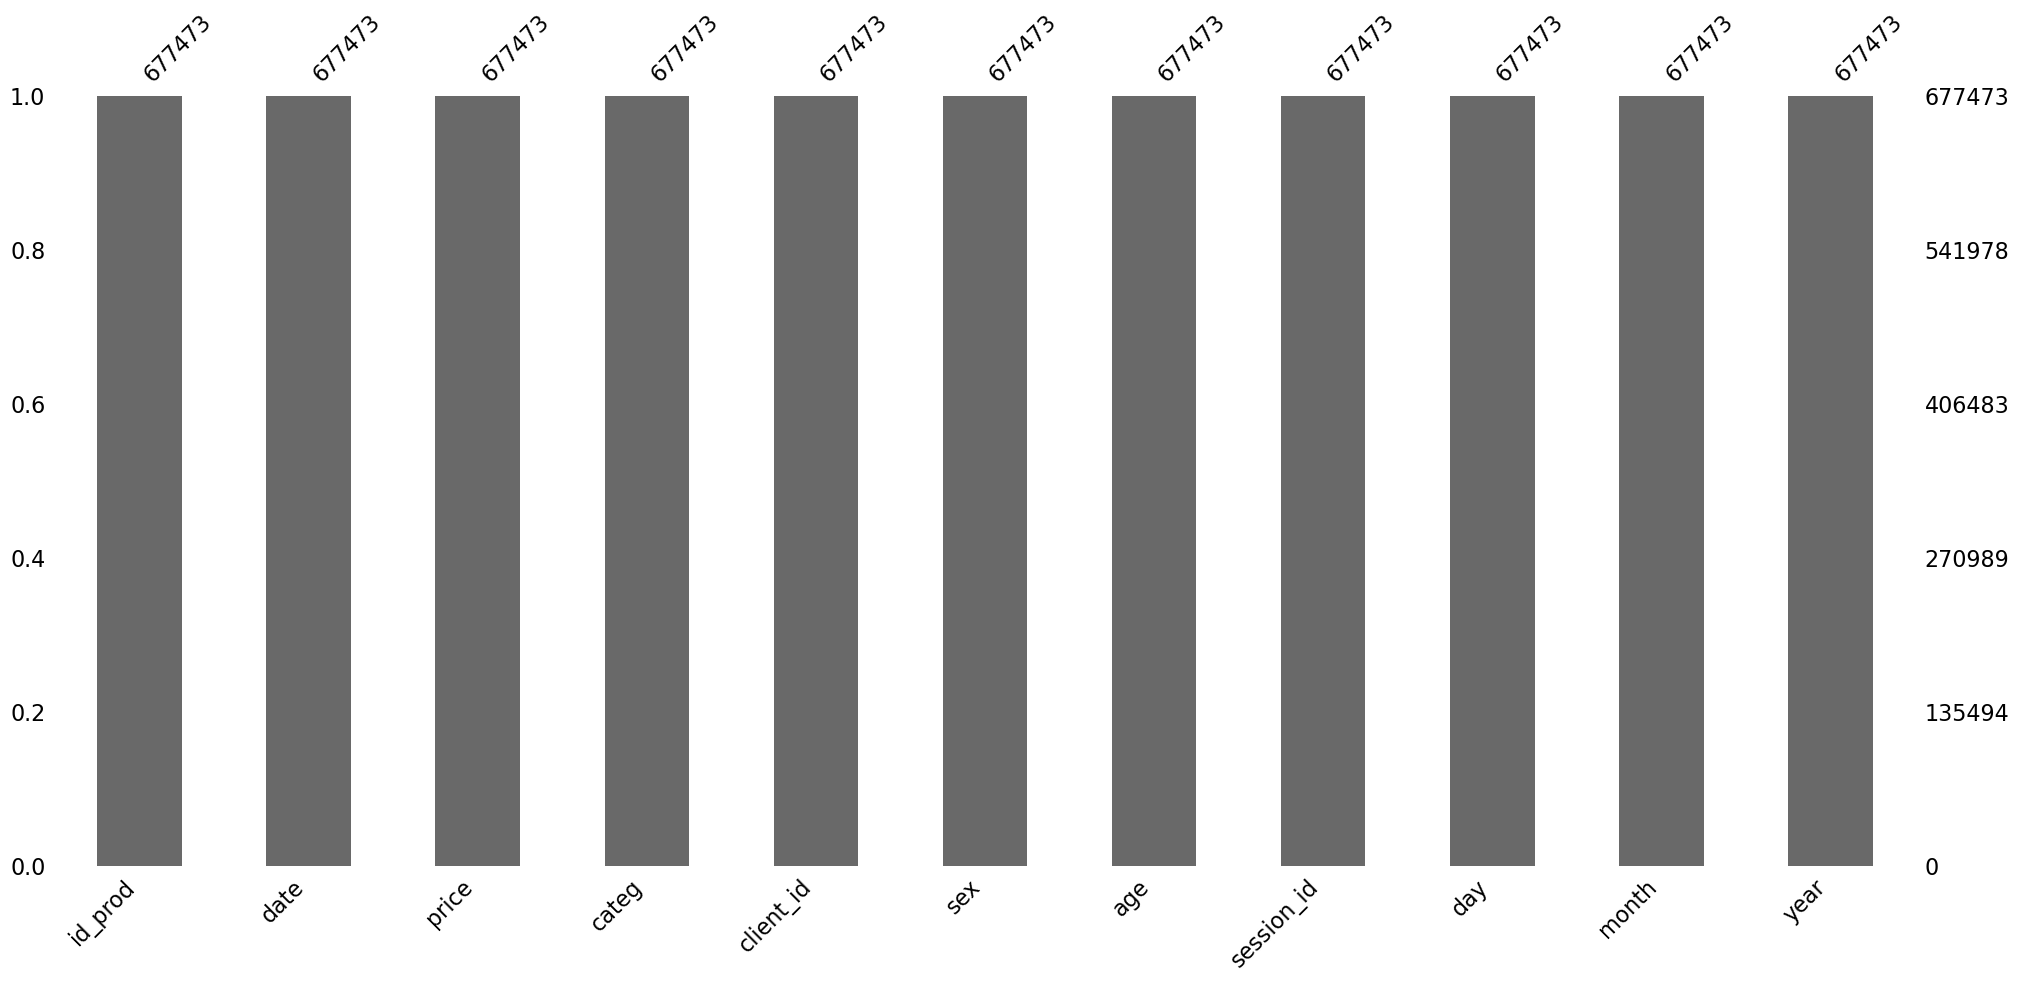

In [43]:
msno.bar(df_lapage)


##### (Le dataframe df_lapage ne contient pas de donnée manquante)

In [44]:
#Export du dataframe au format CSV
df_lapage.to_csv('csv_final/dataframe.csv', index=False, encoding='utf-8')
